In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [10]:
# 1️⃣ CSV-DATEI EINLESEN (Mit angepassten Spaltennamen)
file_path = "schizophrenia_dataset.csv"
df = pd.read_csv(file_path, encoding='utf-8', sep=',')

df.columns = [
    "Patient_ID", "Age", "Gender", "Education_Level", "Marital_Status", "Occupation", "Income_Level",
    "Living_Area", "Diagnosis", "Disease_Duration", "Hospitalizations", "Family_History", "Substance_Use",
    "Suicide_Attempt", "Positive_Symptom_Score", "Negative_Symptom_Score", "GAF_Score", "Social_Support",
    "Stress_Factors", "Medication_Adherence"
]

In [11]:
# 2️⃣ ERSTER ÜBERBLICK ÜBER DIE DATEN
display(df.head())  # Zeigt die ersten 5 Zeilen
display(df.info())  # Infos zu Datentypen und fehlenden Werten
display(df.describe())  # Statistische Übersicht

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_Use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
0,1,72,1,4,2,0,2,1,0,0,0,0,0,0,32,48,72,0,2,2
1,2,49,1,5,2,2,1,0,1,35,1,1,1,1,51,63,40,2,2,0
2,3,53,1,5,3,2,1,0,1,32,0,1,0,0,72,85,51,0,1,1
3,4,67,1,3,2,0,2,0,0,0,0,0,1,0,10,21,74,1,1,2
4,5,54,0,1,2,0,2,1,0,0,0,0,0,0,4,27,98,0,1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Patient_ID              10000 non-null  int64
 1   Age                     10000 non-null  int64
 2   Gender                  10000 non-null  int64
 3   Education_Level         10000 non-null  int64
 4   Marital_Status          10000 non-null  int64
 5   Occupation              10000 non-null  int64
 6   Income_Level            10000 non-null  int64
 7   Living_Area             10000 non-null  int64
 8   Diagnosis               10000 non-null  int64
 9   Disease_Duration        10000 non-null  int64
 10  Hospitalizations        10000 non-null  int64
 11  Family_History          10000 non-null  int64
 12  Substance_Use           10000 non-null  int64
 13  Suicide_Attempt         10000 non-null  int64
 14  Positive_Symptom_Score  10000 non-null  int64
 15  Negative_Symptom_Sco

None

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_Use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


In [12]:
# 3️⃣ WELCHES FELD SOLL VORHERSAGT WERDEN?
prediction_target = "Diagnosis"  # 0: Nicht schizophren, 1: Schizophren
print(f"Wir möchten Vorhersagen für: {prediction_target}")

Wir möchten Vorhersagen für: Diagnosis


In [13]:
# 4️⃣ STATISTISCHE WERTE PRO SPALTE
display(df.describe())

,Patient_ID,Age,Gender,Education_Level,Marital_Status,Occupation,Income_Level,Living_Area,Diagnosis,Disease_Duration,Hospitalizations,Family_History,Substance_Use,Suicide_Attempt,Positive_Symptom_Score,Negative_Symptom_Score,GAF_Score,Social_Support,Stress_Factors,Medication_Adherence
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,48.867700,0.502600,3.042600,1.518200,1.510600,0.996900,0.499400,0.288700,5.859000,1.440300,0.319600,0.217700,0.08840,39.019000,39.4614,67.031800,0.992500,0.998700,1.137500
std,2886.89568,18.215054,0.500018,1.423021,1.117315,1.114097,0.817531,0.500025,0.453181,11.066814,2.824152,0.466345,0.412703,0.28389,27.276962,27.0175,23.999833,0.813578,0.817169,0.821378
min,1.00000,18.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.0000,10.000000,0.000000,0.000000,0.000000
25%,2500.75000,33.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,17.000000,18.0000,54.000000,0.000000,0.000000,0.000000
50%,5000.50000,49.000000,1.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.000000,35.0000,72.000000,1.000000,1.000000,1.000000
75%,7500.25000,65.000000,1.000000,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,5.250000,1.000000,1.000000,0.000000,0.00000,57.000000,57.0000,86.000000,2.000000,2.000000,2.000000
max,10000.00000,80.000000,1.000000,5.000000,3.000000,3.000000,2.000000,1.000000,1.000000,40.000000,10.000000,1.000000,1.000000,1.00000,100.000000,100.0000,100.000000,2.000000,2.000000,2.000000


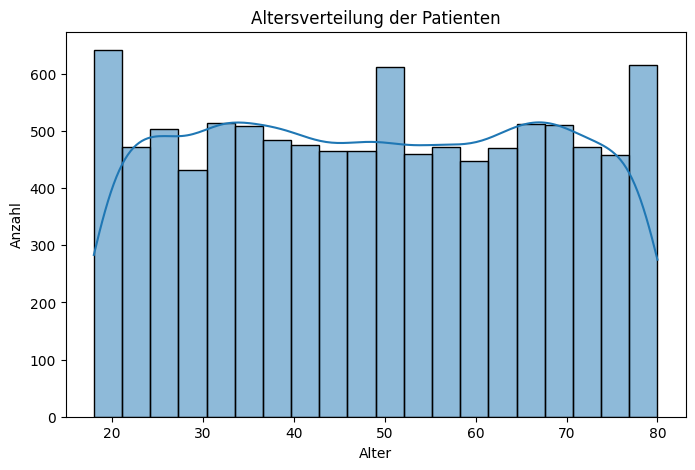

In [14]:
# 5️⃣ HISTOGRAMM FÜR EIN WICHTIGES MERKMAL
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Altersverteilung der Patienten")
plt.xlabel("Alter")
plt.ylabel("Anzahl")
plt.show()


In [15]:
# 6️⃣ OPTIONAL: SCALING EINES FELDES
scaler = MinMaxScaler()
df[["Age"]] = scaler.fit_transform(df[["Age"]])
print("Alter nach MinMax-Skalierung:")
display(df[["Age"]].head())

Alter nach MinMax-Skalierung:


,Age
0,0.870968
1,0.500000
2,0.564516
3,0.790323
4,0.580645


In [16]:
# 7️⃣ BEREINIGTE DATEN SPEICHERN
df.to_csv("schizophrenia_dataset_cleaned.csv", index=False)
print("Datei gespeichert: schizophrenia_dataset_cleaned.csv")

Datei gespeichert: schizophrenia_dataset_cleaned.csv


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler